In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

[-4, 4, -2.0, 2.0]

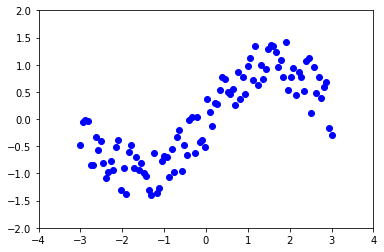

In [2]:
# %% Let's create some toy data

points=100
xs=np.linspace(-3,3,points)
ys=np.sin(xs)+np.random.uniform(-0.5,0.5,points)

#plot
plt.plot(xs,ys,'bo')
plt.axis([-4,4,-2.0,2.0])

In [3]:
# %% tf.placeholders for the input and output of the network. Placeholders are
# variables which we need to fill in when we are ready to compute the graph.
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_normal([1]),name="weights") # 1 is for no of weights 
b = tf.Variable(tf.random_normal([1]), name='bias')
Y_Pred = tf.add(tf.multiply(X, W), b)


In [4]:
#cost fuunction
error_deltas=tf.square(Y_Pred-Y)
loss=tf.reduce_sum(error_deltas)/(points-1)
# regularization
# loss = tf.add(loss, tf.multiply(1e-6, tf.global_norm([W])))

In [5]:
optimizer=tf.train.GradientDescentOptimizer(0.01).minimize(loss)

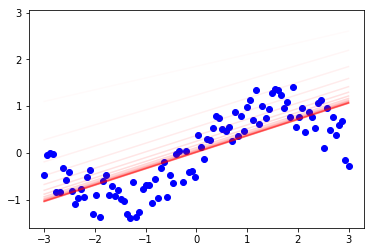

In [6]:
# %% We create a session to use the graph
epochs=1000
plt.plot(xs,ys,'bo')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Fit all training data
    
    loss_expected=0
    for epoch in range(epochs):
        
        for (x,y) in zip(xs,ys):
            sess.run(optimizer,{X:x,Y:y})
        
        #print stuff per every epoch or batch
        
        loss_per_epoch = sess.run(loss,{X:xs,Y:ys})
        #print(loss_per_epoch)
        
        if epoch % 20 == 0:
            plt.plot(xs,Y_Pred.eval(feed_dict={X: xs}, session=sess),'r', alpha=epoch / epochs)

         # Allow the training to quit if we've reached a minimum
        if np.abs(loss_expected - loss_per_epoch) < 0.000001:
            break
        loss_expected = loss_per_epoch
        
plt.show()
